# Plotagem de Gráficos

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import plotnine as p9
except:
    !pip install plotnine
    import plotnine as p9

df = pd.read_csv('Dataset_Covid_CE_Anon_Gen_k1.csv')
df['anonLevel'] = 0
df2 = pd.read_csv('Dataset_Covid_CE_Anon_Gen_k2.csv')
df4 = pd.read_csv('Dataset_Covid_CE_Anon_Gen_k4.csv')
df8 = pd.read_csv('Dataset_Covid_CE_Anon_Gen_k8.csv')
df16 = pd.read_csv('Dataset_Covid_CE_Anon_Gen_k16.csv')
dfs = [df, df2, df4, df8, df16]

df_municipios = pd.read_csv('ce-regions-format.csv')

ks = ['k=01', 'k=02', 'k=04', 'k=08', 'k=16']

semi_id = [
    "municipioCaso",
    "sexoCaso",
    "dataNascimento",
    "resultadoFinalExame",
    "racaCor",
]

%matplotlib inline


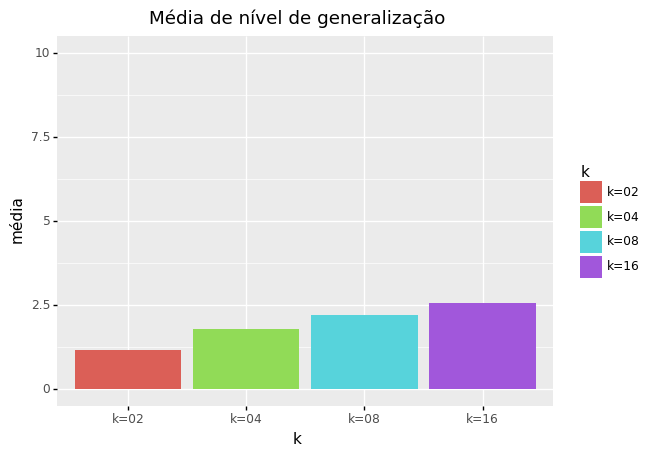

In [228]:
pdf = pd.DataFrame({
    'k': ks, 
    'anon_lvl_mean': [df.anonLevel.mean() for df in dfs],
    'max_anon_lvl': [df.anonLevel.max() for df in dfs],
    'anon_lvl_0': [df.loc[df.anonLevel == 0].shape[0] for df in dfs],
})

pdf

plt1 = (p9.ggplot(pdf.drop(0), p9.aes(x='k', y='anon_lvl_mean', fill='k'))
    + p9.geom_col()
    + p9.labs(y='média', x='k', title='Média de nível de generalização')
    + p9.lims(y=(0, 10))
).draw()


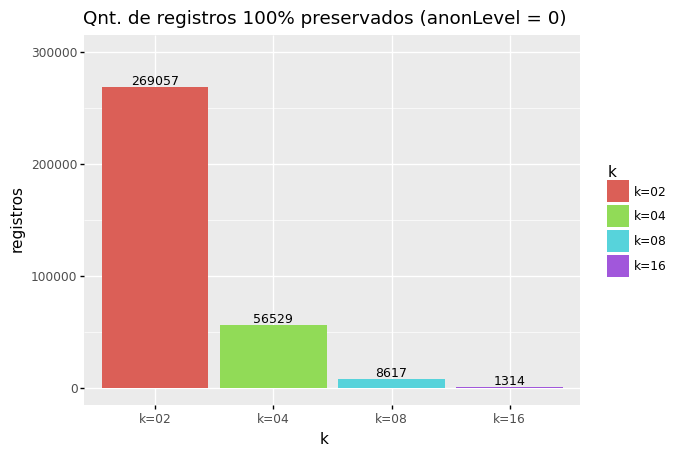

In [194]:
plt2 = (p9.ggplot(pdf.drop(0), p9.aes(x='k', y='anon_lvl_0', fill='k'))
    + p9.geom_col()
    + p9.labs(y='registros', x='k', title='Qnt. de registros 100% preservados (anonLevel = 0)')
    + p9.lims(y=(0, 300000))
    + p9.geom_text(p9.aes(label='anon_lvl_0'), position=p9.position_dodge(width=0.9), size=9, va='bottom')
).draw()

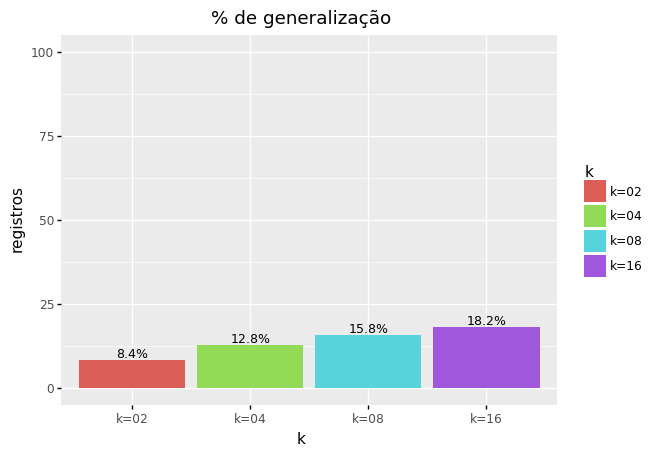

In [195]:
# 14 = nível máximo teórico de generalização (todos semi_ids supressos)
pdf['anon_lvl_sum'] = [df.anonLevel.sum() for df in dfs]
pdf['anon_lvl_per'] = pdf['anon_lvl_sum']/(14*911921)

plt3 = (p9.ggplot(pdf.drop(0), p9.aes(x='k', y='anon_lvl_per*100', fill='k'))
    + p9.geom_col()
    + p9.labs(y='registros', x='k', title=r'% de generalização')
    + p9.lims(y=(0, 100))
    + p9.geom_text(p9.aes(label='round(anon_lvl_per*100, 1)'),
                   position=p9.position_dodge(width=0.9), size=9, va='bottom', format_string='{}%')
).draw()

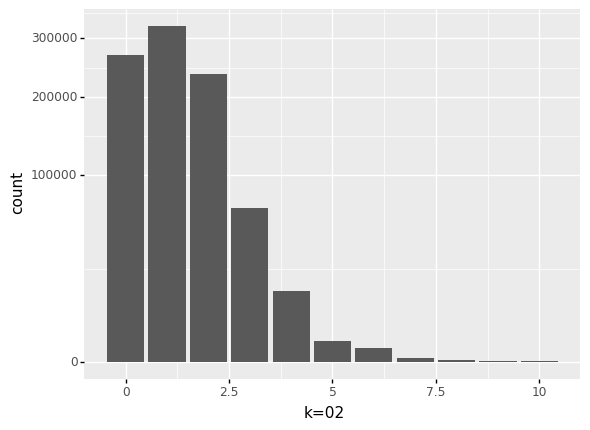

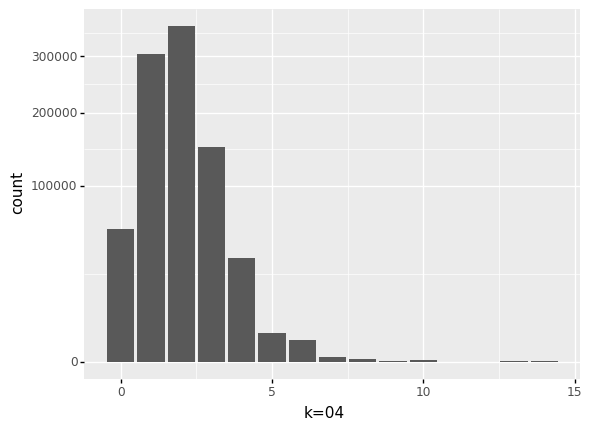

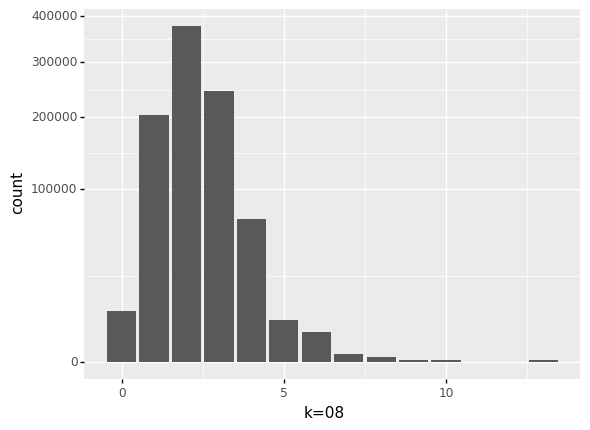

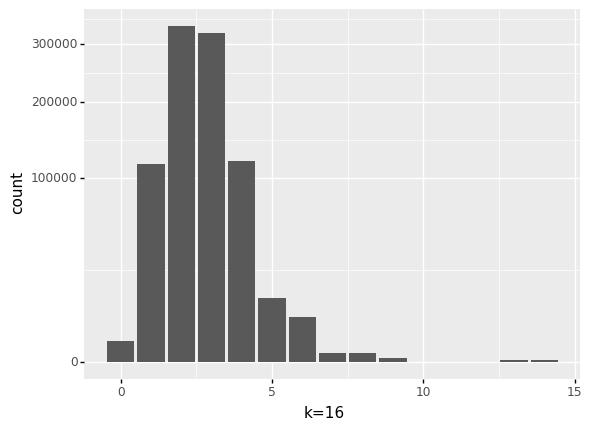

In [284]:
anon_lvl_df = pd.DataFrame({
    'k=02': df2.anonLevel,
    'k=04': df4.anonLevel,
    'k=08': df8.anonLevel,
    'k=16': df16.anonLevel,
})

plt4_1 = (p9.ggplot(anon_lvl_df)
    + p9.geom_bar(p9.aes(x='k=02'))
    + p9.scale_y_sqrt()
).draw()
plt4_2 = (p9.ggplot(anon_lvl_df)
    + p9.geom_bar(p9.aes(x='k=04'))
    + p9.scale_y_sqrt()
).draw()
plt4_3 = (p9.ggplot(anon_lvl_df)
    + p9.geom_bar(p9.aes(x='k=08'))
    + p9.scale_y_sqrt()
).draw()
plt4_4 = (p9.ggplot(anon_lvl_df)
    + p9.geom_bar(p9.aes(x='k=16'))
    + p9.scale_y_sqrt()
).draw()


## Salvar gráficos

In [285]:
plt1.savefig(fname='anon_lvl_mean.png')
plt2.savefig(fname='anon_lvl_0.png')
plt3.savefig(fname='anon_lvl_per.png')
plt4_1.savefig(fname='anon_lvl_dist_k2.png')
plt4_2.savefig(fname='anon_lvl_dist_k4.png')
plt4_3.savefig(fname='anon_lvl_dist_k8.png')
plt4_4.savefig(fname='anon_lvl_dist_k16.png')
